<a href="https://colab.research.google.com/github/RedeemerNtumy/JCPennyConsultancyProject/blob/master/3549063_BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Stirling

# ITNPBD2 Representing and Manipulating Data

# Assignment Autumn 2025

# A Consultancy Job for JC Penney



### First Step is to load the files

To do that, I would need to import all the necessary packages



In [115]:
import pandas as pd
import json
import matplotlib.pyplot as plt

I can now move ahead and read the necessary files

In [116]:
# Starting with just the csv files
products = pd.read_csv("products.csv")
reviews = pd.read_csv("reviews.csv")
users = pd.read_csv("users.csv")

Now that the respective data has been loaded, I can now explore it a bit


I will start off by exploring the products dataset to see what useful information I can get from here

## Products

In [117]:
# View structure without loading whole data
products.head()

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


In [118]:
# Getting a summarised description of the data
products.describe()

,Price,Av_Score
count,5816.000000,7982.000000
mean,144.776618,2.988683
std,499.223719,0.911673
min,-65.270000,1.000000
25%,40.700000,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


It's quite surprising to find a negative price. I would have to check the data a bit more to find out if there are more occurences of this before it is corrected

### Negative value in product price

In [119]:
#Checking the number of affected rows
len(products[products["Price"]<0])

44

There are 44 rows that have a negative price. It could be that the negative symbol was just added by mistake. However we cannot just assume this. I would have to verify with the json file

In [120]:
# Reading the json file with pandas
products_json = pd.read_json("jcpenney_products.json", lines=True)

In [121]:
# Getting the uniq ids for the products that have a negative price
negative_price_product_ids = products[products["Price"]<0]["Uniq_id"].tolist()

In [122]:
# Filter the json data for the negative price product ids
df_json_extracted = products_json[products_json['uniq_id'].isin(negative_price_product_ids)][['uniq_id', 'list_price']]

In [123]:
# Merge the dataframes based on the unique product ID
merged_prices = products[products["Price"]<0].merge(df_json_extracted, left_on='Uniq_id', right_on='uniq_id', how='left')

In [124]:
# Show the merged dataframe
merged_prices[['Name', 'Price', 'list_price']]

,Name,Price,list_price
0,Xersion™ Go Swiftly Vest - Plus,-65.27,-65.27
1,Xersion™ Graphic Leggings - Tall,-58.01,-58.01
2,Xersion™ Graphic Leggings - Tall,-58.01,-58.01
3,Xersion™ Graphic Leggings - Tall,-58.01,-58.01
4,Xersion™ Graphic Tank Top - Girls 7-16 and Plus,-21.76,-21.76
5,Xersion™ Graphic Tank Top,-24.17,-24.17
6,Xersion™ Jagger Girls Athletic Shoes - Little ...,-42.30,-42.3
7,Xersion™ Lincoln Quick-Dri Capris - Tall,-43.51,-43.51
8,Xersion™ Lincoln Quick-Dri Capris - Tall,-43.51,-43.51
9,Xersion™ Lincoln Quick-Dri Capris - Tall,-43.51,-43.51


At a glance, it looks like they are the same. I would have to confirm further to know if this is true

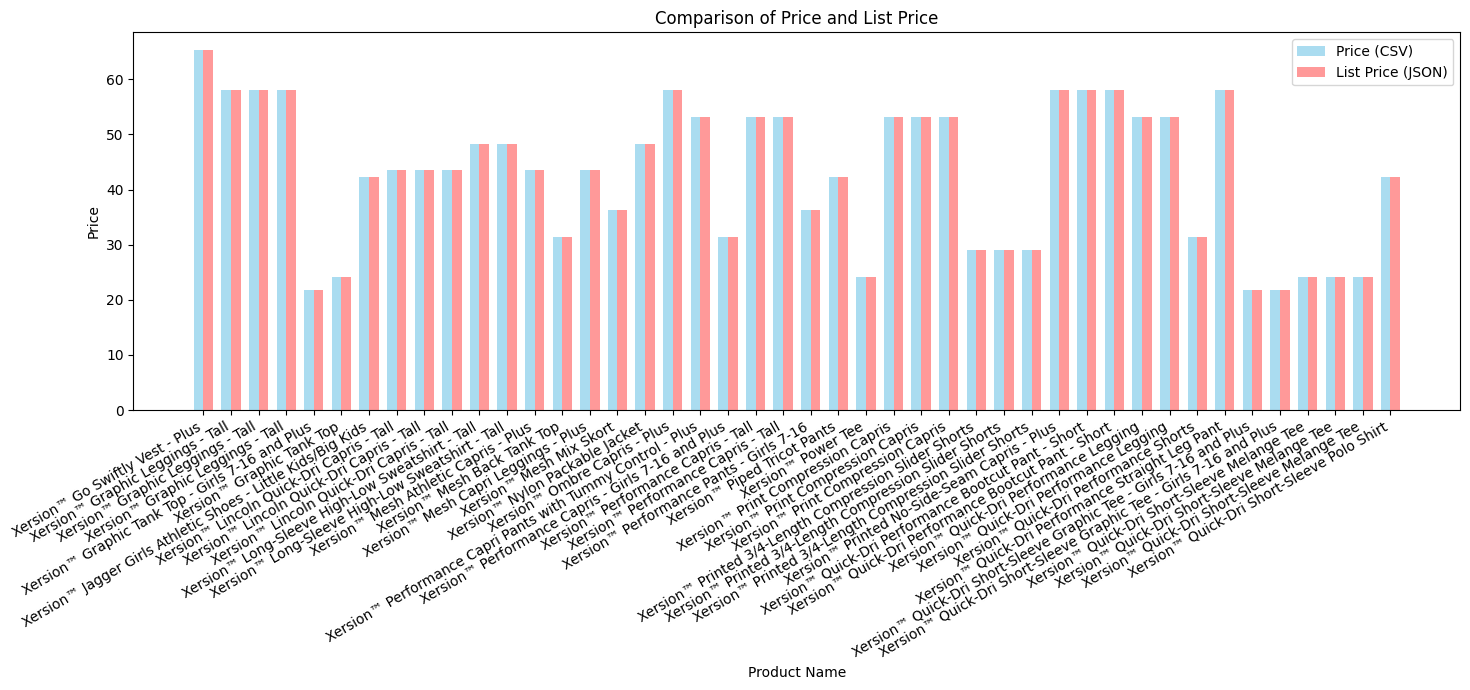

In [125]:
# Creating a bar chart to compare Price and list_price
fig, ax = plt.subplots(figsize=(15, 7))

bar_width = 0.35
index = range(len(merged_prices))

# 'list_price' was read as string so converted to numeric
merged_prices['list_price'] = pd.to_numeric(merged_prices['list_price'], errors='coerce')

# Take the absolute value of the price columns since prices are negative
bar1 = ax.bar(index, merged_prices['Price'].abs(), bar_width, label='Price (CSV)', color='skyblue', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], merged_prices['list_price'].abs(), bar_width, label='List Price (JSON)', color='red', alpha=0.4)

ax.set_xlabel('Product Name')
ax.set_ylabel('Price')
ax.set_title('Comparison of Price and List Price')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(merged_prices['Name'], rotation=30, ha='right')
ax.legend()

plt.tight_layout();

We can now confirm that indeed, the values are the same. Therefore, the negative prices would be fixed in the dataset so we can explore further

In [126]:
products["Price"] = abs(products["Price"])

In [127]:
# Verifying that negative prices are removed
products.describe()

,Price,Av_Score
count,5816.000000,7982.000000
mean,145.424555,2.988683
std,499.035327,0.911673
min,8.010000,1.000000
25%,41.042500,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


### Handling Null Values

In [128]:
# Moving forward to look for null values
products.isna().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


In [129]:
# Checking count of missing SKU values
len(products_json)-len(products_json[products_json["sku"] != ""])

67

Okay, let's see if we can find out if a similar Product Name had the SKU entered. If it is, I would update that Null value with it.

In [130]:
name_counts = products[products['SKU'].isna()]['Name'].value_counts()

In [131]:
duplicate_names = name_counts[name_counts > 1].index

In [132]:
duplicate_name_missing_sku_rows = products[products['SKU'].isna()][products[products['SKU'].isna()]['Name'].isin(duplicate_names)]

In [133]:

display(duplicate_name_missing_sku_rows)

,Uniq_id,SKU,Name,Description,Price,Av_Score
4880,31babfaed4ea91bc810afe3e2d04d19d,NaN,dom by dominique cohen Gold-Tone Textured Dagg...,Toughen up with a cutting-edge pair of brass d...,75.51,1.500
4883,8460df17307111e9d2b56a2df11f5177,NaN,dom by dominique cohen Gold-Tone Textured Dagg...,Toughen up with a cutting-edge pair of brass d...,71.53,2.000
4897,a9861148829d25894572e39e00e84af3,NaN,10K Yellow Gold Hollow 24” Rope Chain,This 24” rope chain in 10K gold offers a timel...,476.98,3.875
7442,d0c3bce0b5299cd03bf4236aef9f57b0,NaN,10K Yellow Gold Hollow 24” Rope Chain,This 24” rope chain in 10K gold offers a timel...,476.98,2.125


However I did not find anyone like that. The ones with more than one occurence did not have sku too

In [134]:
#Since the json also has the SKU as missing, it would be replaced with 'MISSING_SKU' in order to maintain transparency
products["SKU"] = products["SKU"].fillna("MISSING_SKU")

The next null values to deal with are the description. However, I would not be needing them for this particular study (Not doing anything NLP related)

In [135]:
products = products.drop('Description', axis=1)

Now that the Description has been dropped, I would have to deal with the Null prices